In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
#What is the shape of the dataset?

In [7]:
df.shape

(144, 3)

In [ ]:
# Check for null values.

In [9]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

In [ ]:
#List the columns and their data types.

In [11]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [ ]:
# What is the range of years covered?

In [16]:
df['year'].min(), df['year'].max()

(1949, 1960)

In [ ]:
#How many unique months are there?

In [18]:
df['month'].nunique()

12

In [ ]:
#Total number of passengers per year

In [20]:
df.groupby('year')['passengers'].sum()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

In [ ]:
#Which month had the highest total passengers across all years?

In [22]:
df.groupby('month')['passengers'].sum().sort_values(ascending=False).head(1)

month
Jul    4216
Name: passengers, dtype: int64

In [ ]:
#Plot total passengers per month (aggregated across years).

Text(0.5, 1.0, 'Total Passengers by Month')

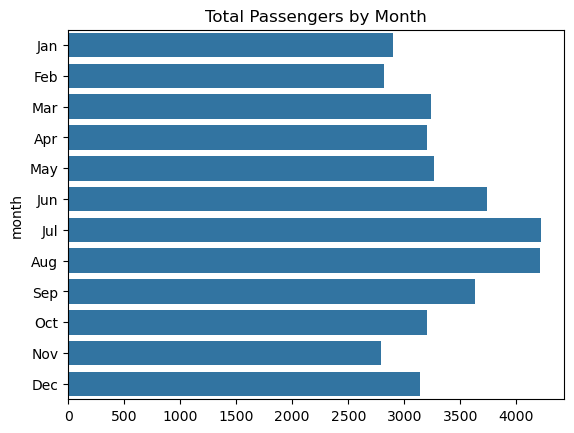

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly = df.groupby('month')['passengers'].sum().sort_values()
sns.barplot(x=monthly.values, y=monthly.index)
plt.title("Total Passengers by Month")


In [ ]:
#Visualize with a heatmap

Text(0.5, 1.0, 'Monthly Passengers Heatmap')

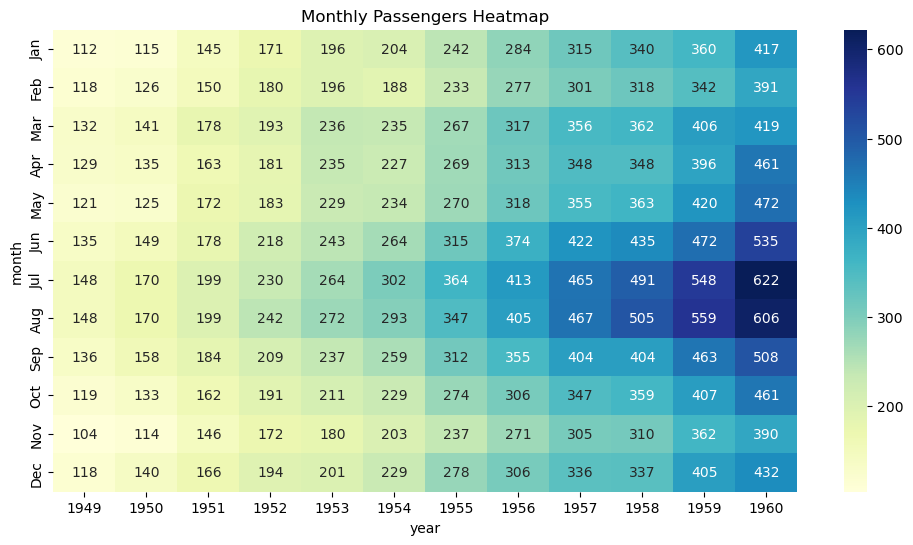

In [32]:

# Pivot the dataset to create a matrix of months vs years
pivot = df.pivot(index="month", columns="year", values="passengers")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Monthly Passengers Heatmap")

In [ ]:
#Which year had the highest total passengers?

In [34]:
df.groupby('year')['passengers'].sum().idxmax()

1960

In [ ]:
#dentify seasonality trends visually

Text(0.5, 1.0, 'Seasonal Distribution of Passengers by Month')

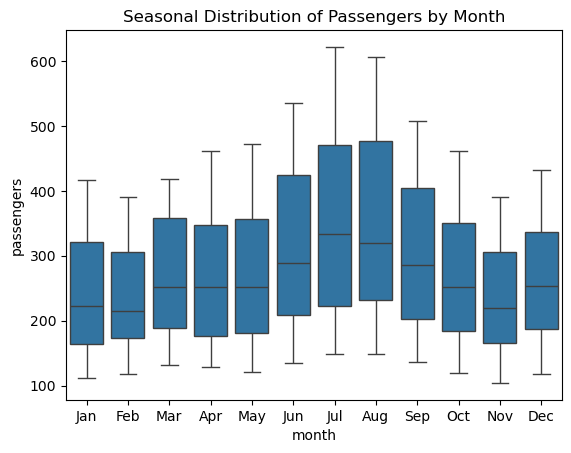

In [36]:
sns.boxplot(x='month', y='passengers', data=df)
plt.title("Seasonal Distribution of Passengers by Month")